In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
f_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['Camiseta', 'Calça', 'Suéter', 'Vestido', 'Casaco',
               'Sandálias', 'Camisa', 'Tênis', 'Bolsa', 'Botas']

In [5]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

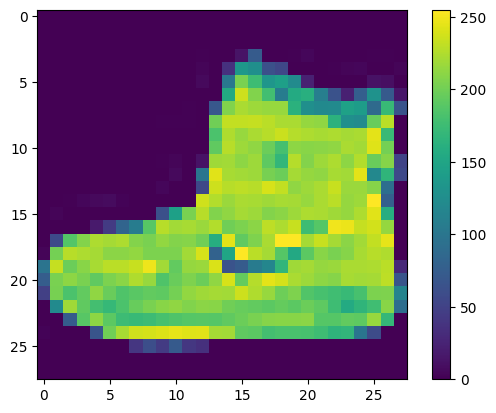

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

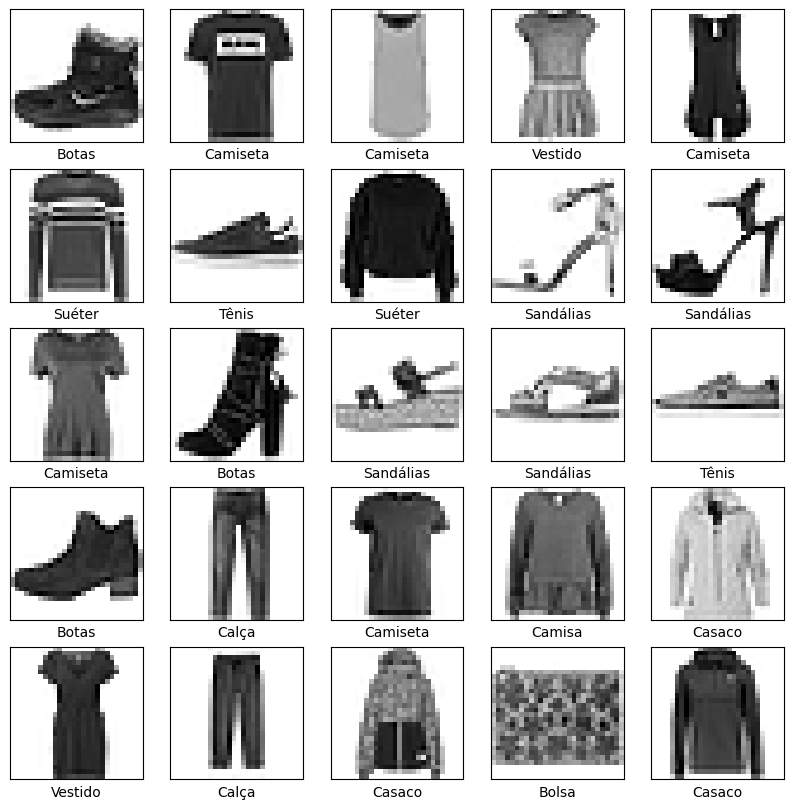

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4985 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3745 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3357 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3117 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2905 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2784 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2651 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2537 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2451 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - lo

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nPrecisão do teste:', test_acc)

313/313 - 1s - loss: 0.3445 - accuracy: 0.8817 - 792ms/epoch - 3ms/step

Precisão do teste: 0.8816999793052673


In [15]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [29]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_valor_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

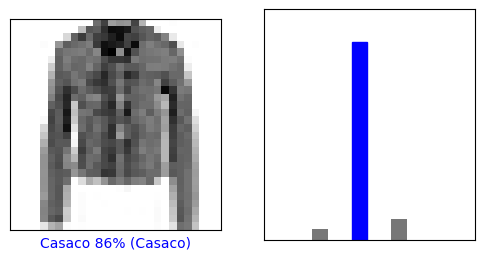

In [30]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_valor_array(i, predictions,  test_labels)
plt.show()